# Import and setup

In [1]:
from pycandy import DiscreteDynamicalSystem as dds
from pycandy import PlotStyler

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dds.available_models()

['standard map',
 'unbounded standard map',
 'henon map',
 'lozi map',
 'rulkov map',
 'logistic map',
 'standard nontwist map',
 'extended standard nontwist map',
 'leonel map',
 '4d symplectic map']

In [7]:
path_figures = "../images"

# Generating trajectories

In [5]:
ds = dds(model="standard map")

## Single initial condition

In [6]:
u = [0.2, 0.5]
k = 1.5
total_time = 2000000

In [8]:
%%time
trajectory = ds.trajectory(u, total_time, parameters=k)

CPU times: user 89.6 ms, sys: 3.03 ms, total: 92.6 ms
Wall time: 93.1 ms


<Figure size 640x480 with 0 Axes>

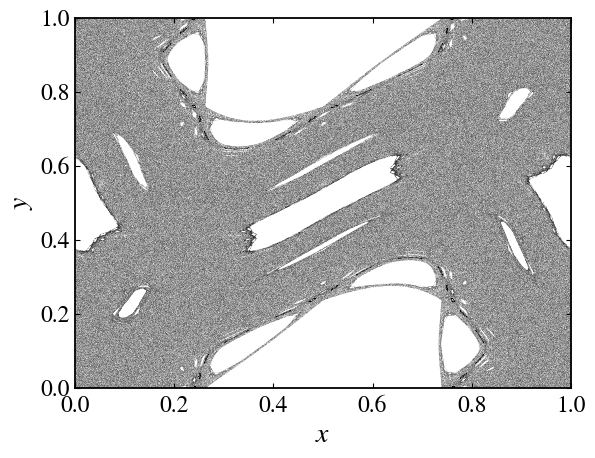

In [9]:
ps = PlotStyler(markersize=0.1, markeredgewidth=0)
ps.apply_style()
fig, ax = plt.subplots()
ps.set_tick_padding(ax, pad_x = 6)
plt.plot(trajectory[:, 0], trajectory[:, 1], "ko")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.savefig(f"{path_figures}/standard_map_trajectory.png", dpi=400, bbox_inches='tight')

## Multiple initial conditions

In [46]:
np.random.seed(13) # We set the seed for reproducibility
x_range = (0, 1) # x range for initial conditions
y_range = (0, 1) # y range for initial conditions
num_ic = 200 # Number of initial conditions
# Generate random initial conditions in the unit square
x_ic = np.random.uniform(x_range[0], x_range[1], num_ic)
y_ic = np.random.uniform(y_range[0], y_range[1], num_ic)
u = np.column_stack((x_ic, y_ic)) # Initial conditions array with shape (M, d)
k = 1.5 # Parameter value
total_time = 50000 # Total time for the simulation

In [47]:
%%time
trajectory = ds.trajectory(u, total_time, parameters=k)

CPU times: user 728 ms, sys: 16.4 ms, total: 745 ms
Wall time: 83.1 ms


In [48]:
trajectories_reshaped = trajectory.reshape(num_ic, total_time, 2)

<Figure size 640x480 with 0 Axes>

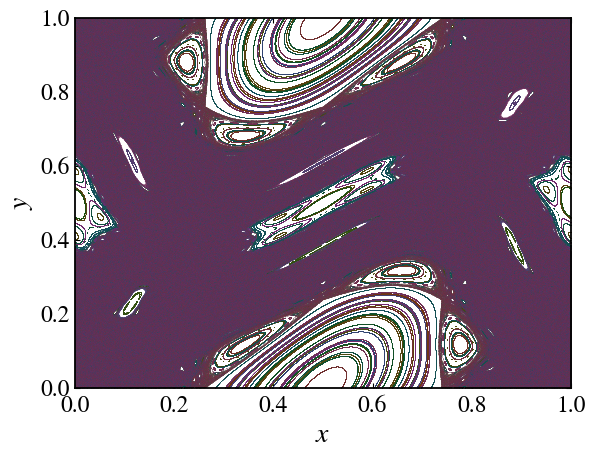

In [ ]:
ps = PlotStyler(markersize=0.2, markeredgewidth=0)
ps.apply_style()
fig, ax = plt.subplots()
ps.set_tick_padding(ax, pad_x = 6)
colors = sns.color_palette("husl", num_ic)

for i in range(trajectories_reshaped.shape[0]):
    # Plot each trajectory with a different color
    plt.plot(trajectories_reshaped[i, :, 0], trajectories_reshaped[i, :, 1], 'o', c=colors[i])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.savefig(f"{path_figures}/standard_map_rand_trajectories.png", dpi=400, bbox_inches='tight')

## Dissipative system

In [50]:
# Create an instance of the Hénon map
ds = dds(model="henon map")

# Parameters for the Hénon map
a = 1.4
b = 0.3
parameters = [a, b]
total_time = 500000
transient_time = 50000

# Generate a trajectory with initial condition (x, y) = (0.2, 0.2)
u = [0.2, 0.2]

In [ ]:
%%time
trajectory = ds.trajectory(u, total_time, parameters=parameters, transient_time=transient_time)

CPU times: user 200 ms, sys: 21.7 ms, total: 222 ms
Wall time: 231 ms


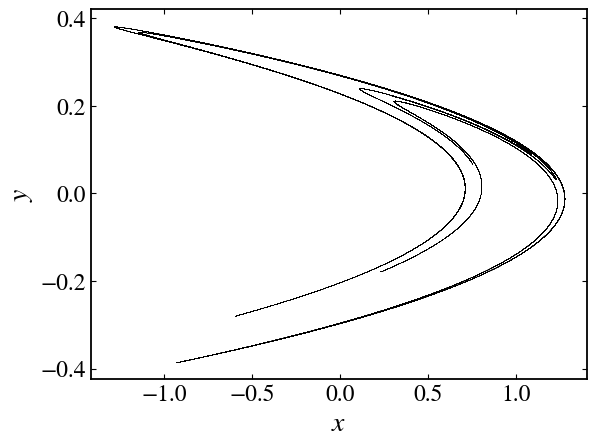

In [ ]:
ps = PlotStyler(markersize=0.2, markeredgewidth=0)
ps.apply_style()
plt.plot(trajectory[:, 0], trajectory[:, 1], "ko")
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.savefig(f"{path_figures}/henon_map_trajectory.png", dpi=400, bbox_inches='tight')

# Bifurcation Diagram

In [53]:
ds = dds(model="logistic map")

In [54]:
param_range = (2.5, 4.0, 3000)
param_index = 0
x0 = 0.2
total_time = 5000
transient_time = 1000

In [55]:
%%time
param_values, bifurcation_diagram = ds.bifurcation_diagram(x0, param_index, param_range, total_time, transient_time=transient_time)

CPU times: user 2.48 s, sys: 32.9 ms, total: 2.51 s
Wall time: 2.11 s


In [56]:
param_values.shape, bifurcation_diagram.shape

((3000,), (3000, 4000))

In [57]:
param_mesh = np.repeat(param_values[:, np.newaxis], bifurcation_diagram.shape[1], axis=1)

# Flatten both arrays
param_values = param_mesh.flatten()
bifurcation_diagram = bifurcation_diagram.flatten()

<Figure size 640x480 with 0 Axes>

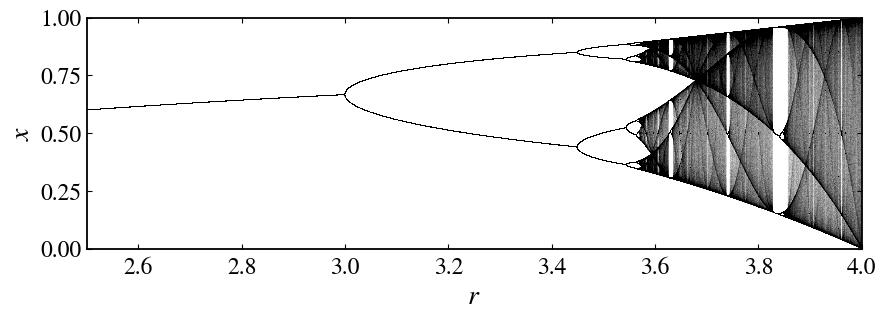

In [ ]:
ps = PlotStyler()
ps.apply_style()
fig, ax = plt.subplots(figsize=(10, 3))
ps.set_tick_padding(ax, pad_x = 6)

plt.scatter(param_values, bifurcation_diagram, color='black', s=0.01, edgecolor='none')
    
plt.xlabel("$r$")
plt.ylabel("$x$")
plt.xlim(param_range[0], param_range[1])
plt.ylim(0, 1)

plt.savefig(f"{path_figures}/logistic_map_bifurcation_diagram.png", dpi=400, bbox_inches='tight')

In [59]:
# Create an instance of the Hénon map
ds = dds(model="henon map")

In [60]:
# Parameters for the Hénon map
b = 0.3
parameters = [b]
total_time = 5000
transient_time = 1000

# Generate the bifurcation diagram for varying 'a'
param_index = 0
param_range = (1.0, 1.4, 3000)

In [61]:
%%time
param_values, bifurcation_data = ds.bifurcation_diagram(
    u=[0.2, 0.2],
    parameters=parameters,
    param_index=param_index,
    param_range=param_range,
    total_time=total_time,
    transient_time=transient_time
)

CPU times: user 2.38 s, sys: 24.6 ms, total: 2.4 s
Wall time: 2.43 s


In [62]:
param_mesh = np.repeat(param_values[:, np.newaxis], bifurcation_data.shape[1], axis=1)

# Flatten both arrays
param_values = param_mesh.flatten()
bifurcation_data = bifurcation_data.flatten()

<Figure size 640x480 with 0 Axes>

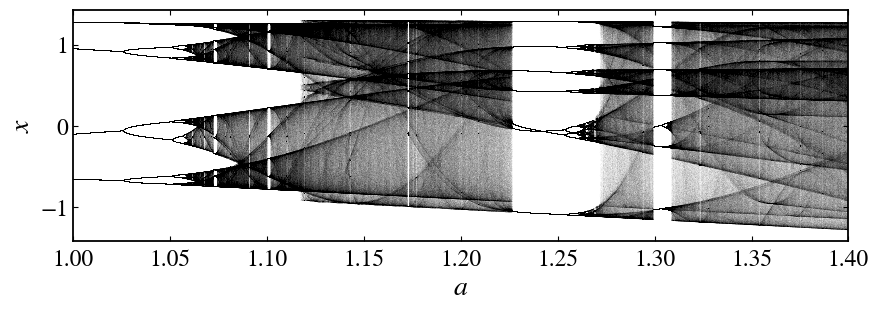

In [ ]:
ps = PlotStyler()
ps.apply_style()
fig, ax = plt.subplots(figsize=(10, 3))
ps.set_tick_padding(ax, pad_x = 6)

plt.scatter(param_values, bifurcation_data, color='black', s=0.01, edgecolor='none')
    
plt.xlabel("$a$")
plt.ylabel("$x$")
plt.xlim(param_range[0], param_range[1])

plt.savefig(f"{path_figures}/henon_map_bifurcation_diagram.png", dpi=400, bbox_inches='tight')

In [64]:
from numba import njit
@njit
def nontwist_sine_circle_map(u, parameters):
    x = u[0]
    a, b, omega = parameters

    x_new = (x + a * (1 - (omega - b * np.sin(2 * np.pi * x)) ** 2)) % 1

    return np.array([x_new])

In [65]:
ds = dds(mapping=nontwist_sine_circle_map, system_dimension=1, number_of_parameters=3)

In [66]:
# Parameters for the Hénon map
a = 0.26
omega = 0.3
parameters = [a, omega]
total_time = 5000
transient_time = 1000

# Generate the bifurcation diagram for varying 'b'
param_index = 1
param_range = (1.2, 1.4, 3000)

In [67]:
%%time
param_values, bifurcation_data, u_new = ds.bifurcation_diagram(
    u=[0.5],
    parameters=parameters,
    param_index=param_index,
    param_range=param_range,
    total_time=total_time,
    transient_time=transient_time,
    continuation=True,
    return_last_state=True
)

CPU times: user 2.25 s, sys: 38.8 ms, total: 2.29 s
Wall time: 2.3 s


In [68]:
%%time
param_range = (1.4, 1.2, 3000)  # Reverse the range for continuation
param_values_back, bifurcation_data_back = ds.bifurcation_diagram(
    u=u_new,
    parameters=parameters,
    param_index=param_index,
    param_range=param_range,
    total_time=total_time,
    transient_time=transient_time,
    continuation=True,
)

CPU times: user 2.02 s, sys: 16.1 ms, total: 2.04 s
Wall time: 2.05 s


In [69]:
param_mesh = np.repeat(param_values[:, np.newaxis], bifurcation_data.shape[1], axis=1)

# Flatten both arrays
param_values = param_mesh.flatten()
bifurcation_data = bifurcation_data.flatten()

param_mesh_back = np.repeat(param_values_back[:, np.newaxis], bifurcation_data_back.shape[1], axis=1)
# Flatten both arrays
param_values_back = param_mesh_back.flatten()
bifurcation_data_back = bifurcation_data_back.flatten()

<Figure size 640x480 with 0 Axes>

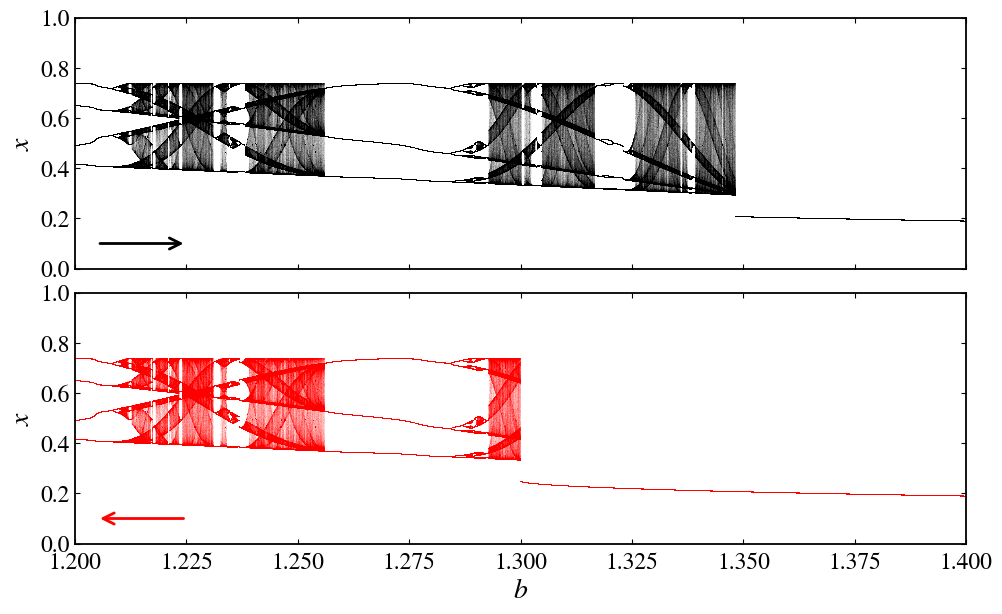

In [ ]:
ps = PlotStyler()
ps.apply_style()
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)
ps.set_tick_padding(ax[1], pad_x = 6)

ax[0].scatter(param_values, bifurcation_data, color='black', s=0.01, edgecolor='none')
ax[1].scatter(param_values_back, bifurcation_data_back, color='r', s=0.01, edgecolor='none')

ax[0].set_ylim(0, 1)
ax[0].set_xlim(param_range[1], param_range[0])    
ax[0].set_ylabel("$x$")
ax[1].set_ylabel("$x$")
ax[1].set_xlabel("$b$")

x_arrow = (1.205, 1.225)
y_arrow = 0.1
ax[0].annotate("", xy=(x_arrow[1], y_arrow), xytext=(x_arrow[0], y_arrow),
             arrowprops=dict(arrowstyle="->", lw=2))

ax[1].annotate("", xy=(x_arrow[0], 0.1), xytext=(x_arrow[1], 0.1),
             arrowprops=dict(arrowstyle="->", lw=2, color='r'))

plt.tight_layout(pad=0.1)

plt.savefig(f"{path_figures}/nontwist_sine_circle_bifurcation_diagram.png", dpi=400, bbox_inches='tight')

# Chaotic indicators

## Lyapunov exponents

### One-dimensional map

In [71]:
ds = dds(model="logistic map")

In [72]:
x0 = 0.2
r = [2.6, 3.1, 3.5, 3.8]
total_time = 10000
transient_time = 5000

In [73]:
lyapunovs_exponents = [ds.lyapunov(x0, total_time, parameters=r_i, transient_time=transient_time) for r_i in r]

In [74]:
print(lyapunovs_exponents)

[-0.5108256237660053, -0.2638163710411688, -0.8725073457794915, 0.44047142185628363]


In [75]:
param_range = (2.5, 4.0, 3000)
r = np.linspace(param_range[0], param_range[1], param_range[2])
param_index = 0
x0 = 0.2
total_time = 5000
transient_time = 1000

In [76]:
%%time
param_values, bifurcation_diagram = ds.bifurcation_diagram(x0, param_index, r, total_time, transient_time=transient_time)
param_mesh = np.repeat(param_values[:, np.newaxis], bifurcation_diagram.shape[1], axis=1)

# Flatten both arrays
param_values = param_mesh.flatten()
bifurcation_diagram = bifurcation_diagram.flatten()

CPU times: user 2.06 s, sys: 29.3 ms, total: 2.09 s
Wall time: 2.12 s


In [77]:
%%time
lyapunovs_exponents = [ds.lyapunov(x0, total_time, parameters=r_i, transient_time=transient_time) for r_i in r]

CPU times: user 1.97 s, sys: 24.1 ms, total: 2 s
Wall time: 2 s


<Figure size 640x480 with 0 Axes>

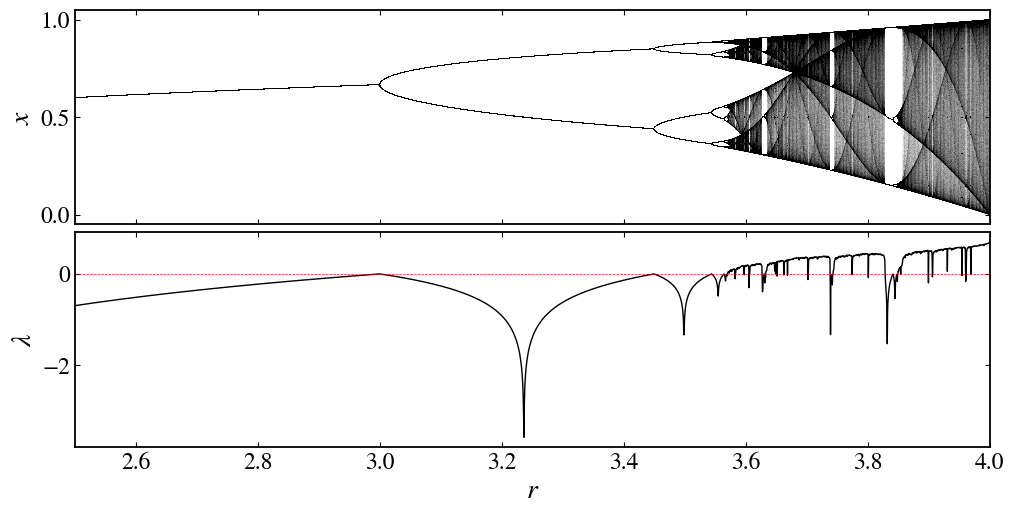

In [ ]:
ps = PlotStyler(linewidth=1)
ps.apply_style()

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 5))

ax[0].set_xlim(param_range[0], param_range[1])
ax[0].scatter(param_values, bifurcation_diagram, color='black', s=0.01, edgecolor='none')
ax[0].set_ylabel("$x$")

ax[1].plot(r, lyapunovs_exponents, 'k-')
ax[1].axhline(0, color='red', linestyle='--', linewidth=0.5)
ax[1].set_xlabel("$r$")
ax[1].set_ylabel(r"$\lambda$")

plt.tight_layout(pad=0.1)

plt.savefig(f"{path_figures}/logistic_map_lyapunov_exponents.png", dpi=400, bbox_inches='tight')

### Higher-dimensional maps

In [79]:
ds = dds(model="henon map")

In [80]:
a = 1.4
b = 0.3
parameters = [a, b]
total_time = 50000
transient_time = 10000
u = [0.2, 0.2]
lyapunovs_exponents = ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time)
print(lyapunovs_exponents)

[ 0.4182113  -1.62218411]


In [81]:
%%timeit
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time)

14.7 ms ± 138 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [82]:
%%timeit
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, method="QR_HH")

64.3 ms ± 8.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [83]:
ds = dds(model="4d symplectic map")

In [84]:
ds.info["parameters"]

['eps1', 'eps2', 'xi']

In [85]:
u = [[0.5, 0, 0.5, 0],
     [3.0, 0, 0.5, 0]]

eps1 = 0.5
eps2 = 0.1
xi = 0.001
parameters = [eps1, eps2, xi]
total_time = 1000000

In [86]:
%%time
lyapunov_exponents = [ds.lyapunov(u[i], total_time, parameters=parameters) for i in range(len(u))]

CPU times: user 8.03 s, sys: 33.1 ms, total: 8.07 s
Wall time: 8.08 s


In [87]:
lyapunov_exponents

[array([ 9.79366628e-06,  6.43341772e-07, -1.62300788e-06, -8.81400017e-06]),
 array([ 0.00946666,  0.00026615, -0.0002705 , -0.00946231])]

In [88]:
print([np.sum(lyapunov_exponents[i]) for i in range(len(u))])

[-9.0801931945661e-19, -2.0816681711721685e-17]


In [89]:
u = [[0.5, 0, 0.5, 0],
     [3.0, 0, 0.5, 0]]

eps1 = 0.5
eps2 = 0.1
xi = 0.001
parameters = [eps1, eps2, xi]
total_time = 1000000
sample_times = np.unique(np.logspace(np.log10(1), np.log10(total_time), 1000).astype(int))

In [90]:
%%time
LEs = np.zeros((len(u), len(sample_times), 4))
for i in range(len(u)):
    lyapunov_exponents = ds.lyapunov(u[i], total_time, parameters=parameters, return_history=True, sample_times=sample_times)
    LEs[i, :, :] = lyapunov_exponents

CPU times: user 10.5 s, sys: 53.7 ms, total: 10.6 s
Wall time: 10.6 s


In [91]:
LEs.shape

(2, 761, 4)

<Figure size 640x480 with 0 Axes>

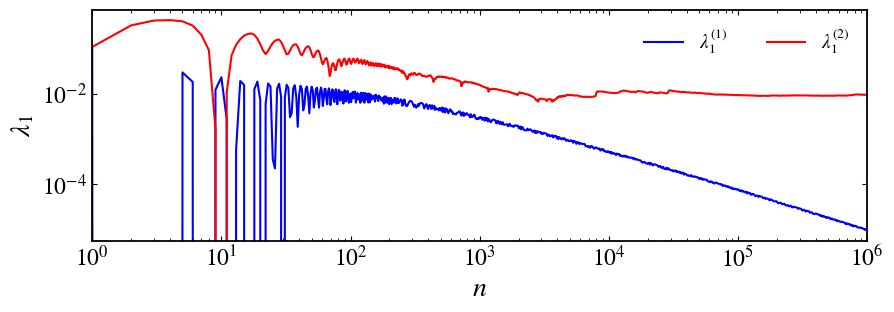

In [ ]:
ps = PlotStyler(linewidth=1.5)
ps.apply_style()
fig, ax = plt.subplots(figsize=(10, 3))

ax.plot(sample_times, LEs[0, :, 0], label=r"$\lambda_1^{(1)}$", color='b')
ax.plot(sample_times, LEs[1, :, 0], label=r"$\lambda_1^{(2)}$", color='r')
ax.set_xscale('log')
ax.set_yscale("log")
ax.legend(ncol=2, frameon=False)
ax.set_xlim(1, total_time)
ax.set_xlabel("$n$")
ax.set_ylabel(r"$\lambda_1$")
plt.savefig(f"{path_figures}/4d_symplectic_map_lyapunov_exponents.png", dpi=400, bbox_inches='tight')

## Linear dependence index

In [93]:
ds = dds(model="4d symplectic map")

In [94]:
ds.info["parameters"]

['eps1', 'eps2', 'xi']

In [95]:
u = [[0.5, 0, 0.5, 0],
     [3.0, 0, 0.5, 0]]

k = [2, 3, 4]
eps1 = 0.5
eps2 = 0.1
xi = 0.001
parameters = [eps1, eps2, xi]
total_time = 1000000
sample_times = np.unique(np.logspace(np.log10(1), np.log10(total_time), 1000).astype(int))

In [96]:
%%time
LDIs = np.zeros((len(u), len(sample_times), len(k)))
for i in range(len(u)):
    for j in range(len(k)):
        ldi = ds.LDI(u[i], total_time, k[j], parameters=parameters, return_history=True, sample_times=sample_times)
        LDIs[i, :, j] = ldi

/opt/anaconda3/lib/python3.12/site-packages/numba/core/utils.py:661: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


CPU times: user 1min 39s, sys: 436 ms, total: 1min 40s
Wall time: 1min 39s


<Figure size 640x480 with 0 Axes>

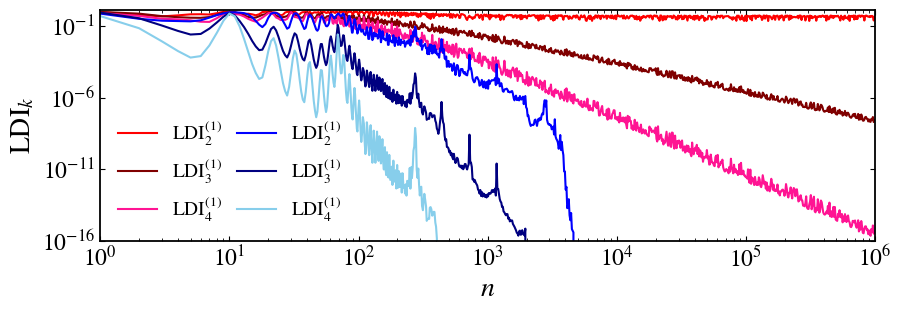

In [ ]:
ps = PlotStyler(linewidth=1.5)
ps.apply_style()
fig, ax = plt.subplots(figsize=(10, 3))
colors = [["red", "maroon", "deeppink"], ["blue", "navy", "skyblue"]]

for i in range(len(u)):
    for j in range(len(k)):
        ax.plot(sample_times, LDIs[i, :, j], label=rf"$\mathrm{{LDI}}_{k[j]}^{{(1)}}$", color=colors[i][j])
ax.legend(ncol=2, frameon=False, columnspacing=0.75)
ax.set_ylim(1e-16, np.sqrt(2))
ax.set_xlim(1, total_time)
ax.set_xlabel("$n$")
ax.set_ylabel(r"$\mathrm{LDI}_k$")
ax.set_xscale('log')
ax.set_yscale("log")

plt.savefig(f"{path_figures}/4d_symplectic_map_ldi.png", dpi=400, bbox_inches='tight')

## Weighted Birkhoff averages

In [98]:
ds = dds(model="standard map")

In [99]:
num_ic = 250
x_range = (0, 1)  # x range for initial conditions
y_range = (0, 1)  # y range for initial conditions
np.random.seed(0)  # Set the seed for reproducibility
x_ic = np.random.uniform(x_range[0], x_range[1], num_ic)
y_ic = np.random.uniform(y_range[0], y_range[1], num_ic)
u = np.column_stack((x_ic, y_ic))  # Initial conditions array with shape (M, d)
k = 1.5  # Parameter value
total_time = 10000  # Total time for the simulation

In [100]:
%%time
dig = [ds.dig(u[i], total_time, parameters=k) for i in range(num_ic)]
dig1 = np.array(dig)

CPU times: user 327 ms, sys: 5.72 ms, total: 333 ms
Wall time: 124 ms


In [101]:
%%time
dig = [ds.dig(u[i], total_time, parameters=k, func=lambda x: np.sin(2 * np.pi * x[:, 0])) for i in range(num_ic)]
dig2 = np.array(dig)

CPU times: user 128 ms, sys: 7.42 ms, total: 135 ms
Wall time: 152 ms


In [102]:
%%time
dig = [ds.dig(u[i], total_time, parameters=k, func=lambda x: np.sin(2 * np.pi * (x[:, 0] + x[:, 1]))) for i in range(num_ic)]
dig3 = np.array(dig)

CPU times: user 119 ms, sys: 2.6 ms, total: 122 ms
Wall time: 123 ms


In [103]:
trajectories = ds.trajectory(u, total_time, parameters=k)
trajectories_reshaped = trajectories.reshape(num_ic, total_time, 2)

<Figure size 640x480 with 0 Axes>

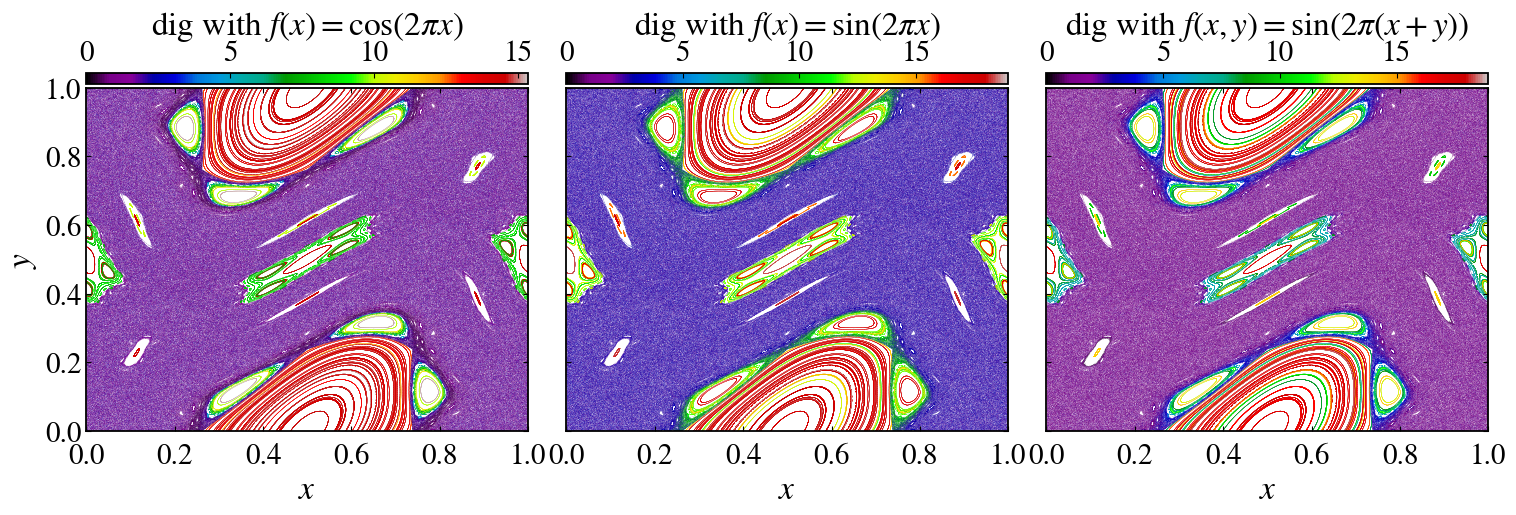

In [ ]:
ps = PlotStyler(fontsize=24)
ps.apply_style()
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
[ps.set_tick_padding(ax[i], pad_x = 8) for i in range(3)]
for i in range(num_ic):
    hm1 = ax[0].scatter(trajectories_reshaped[i, :, 0], trajectories_reshaped[i, :, 1], c=dig1[i] * np.ones(total_time), s=0.05, edgecolor='none', cmap="nipy_spectral", vmin=0, vmax=dig1[dig1 != np.inf].max())
    hm2 = ax[1].scatter(trajectories_reshaped[i, :, 0], trajectories_reshaped[i, :, 1], c=dig2[i] * np.ones(total_time), s=0.05, edgecolor='none', cmap="nipy_spectral", vmin=0, vmax=dig2.max())
    hm3 = ax[2].scatter(trajectories_reshaped[i, :, 0], trajectories_reshaped[i, :, 1], c=dig3[i] * np.ones(total_time), s=0.05, edgecolor='none', cmap="nipy_spectral", vmin=0, vmax=dig3.max())

plt.colorbar(hm1, ax=ax[0], label=r"dig with $f(x) = \cos(2\pi x)$", location="top", aspect=40, pad=0.01)
plt.colorbar(hm2, ax=ax[1], label=r"dig with $f(x) = \sin(2\pi x)$", location="top", aspect=40, pad=0.01)
plt.colorbar(hm3, ax=ax[2], label=r"dig with $f(x, y) = \sin(2\pi(x + y))$", location="top", aspect=40, pad=0.01)
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")
ax[1].set_xlabel("$x$")
ax[2].set_xlabel("$x$")

plt.tight_layout(pad=0.05)
plt.savefig(f"{path_figures}/standard_map_dig.png", dpi=400, bbox_inches='tight')

## Recurrence time entropy

In [105]:
ds = dds(model="standard map")

### Recurrence matrix

In [106]:
u = [[0.05, 0.05],
     [0.35, 0.0],
     [0.43, 0.2]]
k = 1.5
total_time = 500000

In [107]:
trajectories = ds.trajectory(u, total_time, parameters=k).reshape(len(u), total_time, 2)

<Figure size 640x480 with 0 Axes>

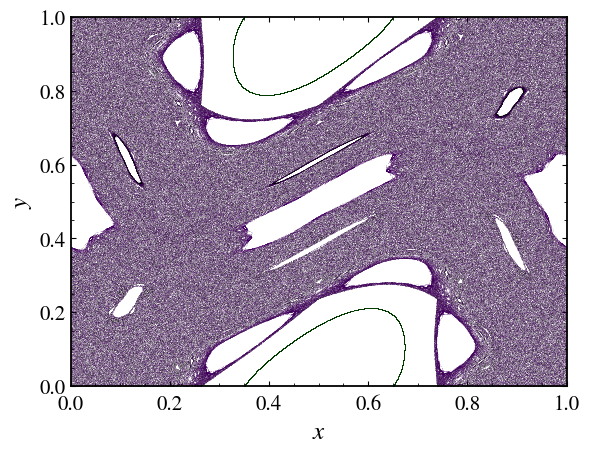

In [ ]:
ps = PlotStyler(fontsize=18, markersize=0.2, markeredgewidth=0, minor_ticks_visible=True)
ps.apply_style()
fig, ax = plt.subplots()
ps.set_tick_padding(ax, pad_x = 6)
colors = ["black", "green", "darkviolet"]
for i in range(len(u)):
    plt.plot(trajectories[i, :, 0], trajectories[i, :, 1], "o", c=colors[i])
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig(f"{path_figures}/rte_trajectories.png", dpi=400, bbox_inches='tight')

In [109]:
from pycandy import TimeSeriesMetrics

In [110]:
recmats = []
Ps = []
for i in range(len(u)):
    tsm = TimeSeriesMetrics(trajectories[i, :1000, :])
    recmat, P = tsm.recurrence_matrix(compute_white_vert_distr=True, threshold=0.1)
    recmats.append(recmat)
    Ps.append(P)

<Figure size 640x480 with 0 Axes>

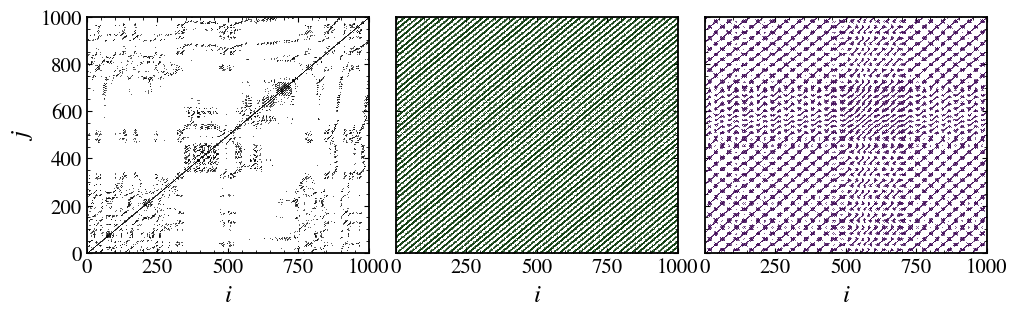

In [ ]:
ps = PlotStyler(fontsize=18, markersize=0.5, markeredgewidth=0, minor_ticks_visible=True)
ps.apply_style()
fig, ax = plt.subplots(1, 3, figsize=(10, 3), sharey=True, sharex=True)

for i in range(len(u)):
    # Find the indices of the non-zero elements in the recurrence matrix
    non_zero_indices = np.nonzero(recmats[i])
    # Plot the non-zero elements
    ax[i].plot(non_zero_indices[0], non_zero_indices[1], "o", c=colors[i])
ax[0].set_xlim(0, 1000)
ax[0].set_ylim(0, 1000)
ax[0].set_xlabel("$i$")
ax[0].set_ylabel("$j$")
ax[1].set_xlabel("$i$")
ax[2].set_xlabel("$i$")

plt.tight_layout(pad=0.05)
plt.savefig(f"{path_figures}/rte_recurrence_matrices.png", dpi=400, bbox_inches='tight')

In [112]:
rtes = []
for i in range(len(u)):
    tsm = TimeSeriesMetrics(trajectories[i, :1000, :])
    rte = tsm.recurrence_time_entropy()
    rtes.append(rte)
print(rtes)

[4.961395761597473, 1.190112332533454, 2.1694882785487892]


0.044496214327315084
0.41141412070261774
0.43444611887308116


<Figure size 640x480 with 0 Axes>

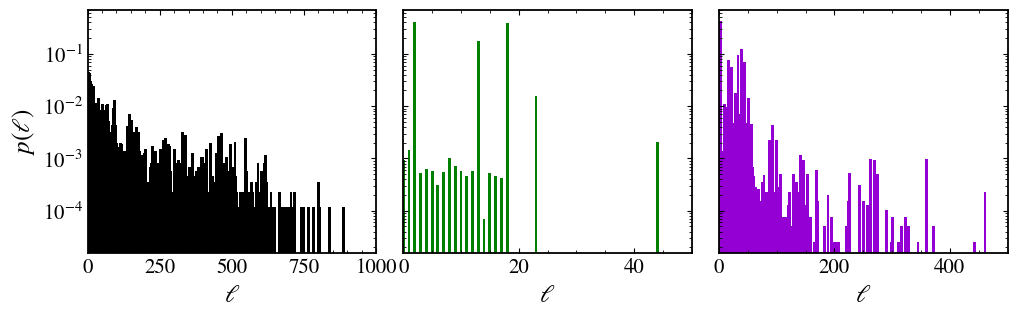

In [ ]:
ps = PlotStyler(fontsize=18, markersize=0.5, markeredgewidth=0, minor_ticks_visible=True)
ps.apply_style()
fig, ax = plt.subplots(1, 3, figsize=(10, 3), sharey=True)
width = [10, .5, 5]
for i in range(len(u)):
    Ns = np.arange(Ps[i].shape[0])
    P_norm = Ps[i] / Ps[i].sum()
    print(P_norm.max())
    ax[i].bar(Ns, P_norm, color=colors[i], width=width[i])
ax[0].set_yscale("log")
ax[0].set_xlim(0, 1000)
ax[1].set_xlim(0, 50)
ax[2].set_xlim(0, 500)
ax[0].set_ylabel(r"$p(\ell)$")
ax[0].set_xlabel(r"$\ell$")
ax[1].set_xlabel(r"$\ell$")
ax[2].set_xlabel(r"$\ell$")

plt.tight_layout(pad=0.05)
plt.savefig(f"{path_figures}/rte_white_vert_distr.png", dpi=400, bbox_inches='tight')

In [114]:
u = [[0.05, 0.05],
     [0.35, 0.0],
     [0.43, 0.2]]
k = 1.5
total_time = 1000
rtes = [ds.recurrence_time_entropy(u[i], total_time, parameters=k) for i in range(len(u))]
print(rtes)

[4.961395761597473, 1.190112332533454, 2.1694882785487892]


### RTE

In [115]:
num_ic = 250
x_range = (0, 1)  # x range for initial conditions
y_range = (0, 1)  # y range for initial conditions
np.random.seed(0)  # Set the seed for reproducibility
x_ic = np.random.uniform(x_range[0], x_range[1], num_ic)
y_ic = np.random.uniform(y_range[0], y_range[1], num_ic)
u = np.column_stack((x_ic, y_ic))  # Initial conditions array with shape (M, d)
k = [0.9, 1.5, 3.6]  # Parameter values
total_time = 10000  # Total time for the simulation

In [116]:
%%time
rte = [ds.recurrence_time_entropy(u[i], total_time, parameters=k[j]) for i in range(num_ic) for j in range(len(k))]
rte = np.array(rte).reshape(num_ic, len(k))

CPU times: user 1min 5s, sys: 3.33 s, total: 1min 9s
Wall time: 1min 9s


In [117]:
trajectories = [ds.trajectory(u, total_time, parameters=k[i]) for i in range(len(k))]

In [118]:
trajectories_reshaped = []
for trajectory in trajectories:
    trajectory_reshaped = trajectory.reshape(num_ic, total_time, 2)
    trajectories_reshaped.append(trajectory_reshaped)

<Figure size 640x480 with 0 Axes>

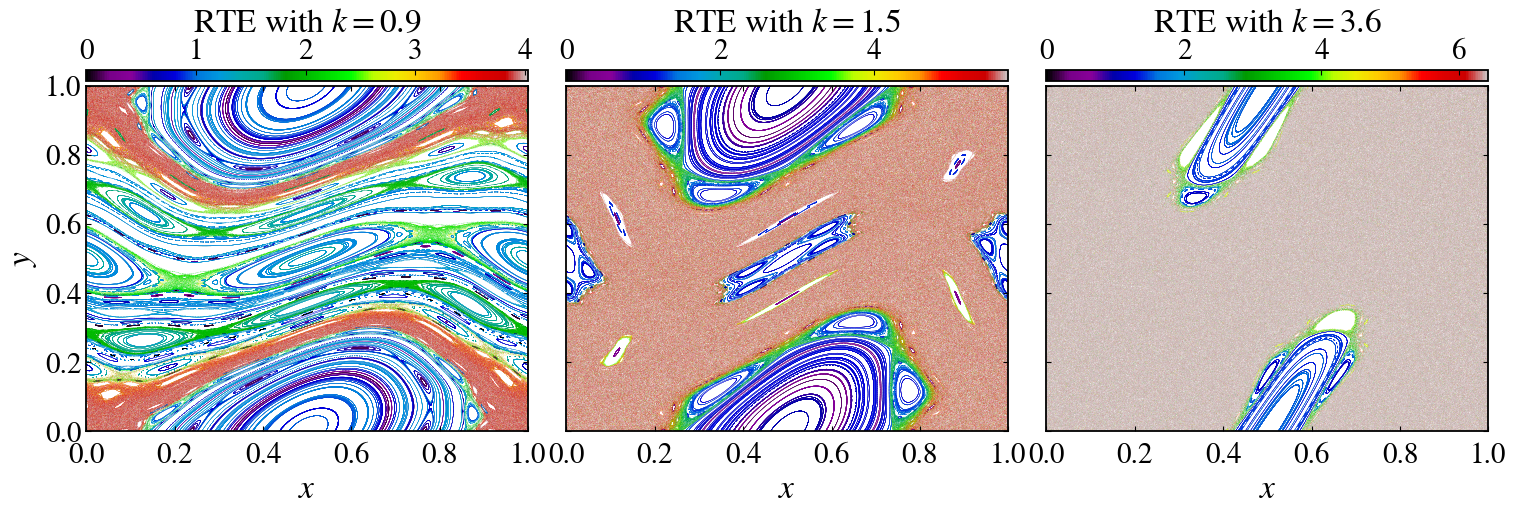

In [ ]:
ps = PlotStyler(fontsize=24)
ps.apply_style()
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
[ps.set_tick_padding(ax[i], pad_x = 8) for i in range(3)]

hms = [0, 0, 0]
for j in range(len(k)):
    for i in range(num_ic):
        hm = ax[j].scatter(trajectories_reshaped[j][i, :, 0],
                           trajectories_reshaped[j][i, :, 1],
                           c=rte[i, j] * np.ones(total_time),
                           s=0.05,
                           edgecolor='none',
                           cmap="nipy_spectral",
                           vmin=0,
                           vmax=rte[:, j].max())
        hms[j] = hm

[plt.colorbar(hms[i], ax=ax[i], label=rf"RTE with $k = {k[i]:.1f}$", location="top", aspect=40, pad=0.01) for i in range(len(k))]
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel("$y$")
[ax[i].set_xlabel("$x$") for i in range(len(k))]

plt.tight_layout(pad=0.05)
plt.savefig(f"{path_figures}/standard_map_rte.png", dpi=400, bbox_inches='tight')

## Hurst exponent

In [120]:
ds = dds(model="standard map")

In [121]:
num_ic = 250
x_range = (0, 1)  # x range for initial conditions
y_range = (0, 1)  # y range for initial conditions
np.random.seed(0)  # Set the seed for reproducibility
x_ic = np.random.uniform(x_range[0], x_range[1], num_ic)
y_ic = np.random.uniform(y_range[0], y_range[1], num_ic)
u = np.column_stack((x_ic, y_ic))  # Initial conditions array with shape (M, d)
k = [0.9, 1.5, 3.6]  # Parameter values
total_time = 10000  # Total time for the simulation

In [122]:
%%time
H = [ds.hurst_exponent(u[i], total_time, parameters=k[j]) for i in range(num_ic) for j in range(len(k))]
H = np.array(H).reshape(num_ic, len(k), 2)

CPU times: user 4min 8s, sys: 933 ms, total: 4min 9s
Wall time: 4min 9s


In [123]:
trajectories = [ds.trajectory(u, total_time, parameters=k[i]) for i in range(len(k))]

In [124]:
trajectories_reshaped = []
for trajectory in trajectories:
    trajectory_reshaped = trajectory.reshape(num_ic, total_time, 2)
    trajectories_reshaped.append(trajectory_reshaped)

In [125]:
H.shape

(250, 3, 2)

<Figure size 640x480 with 0 Axes>

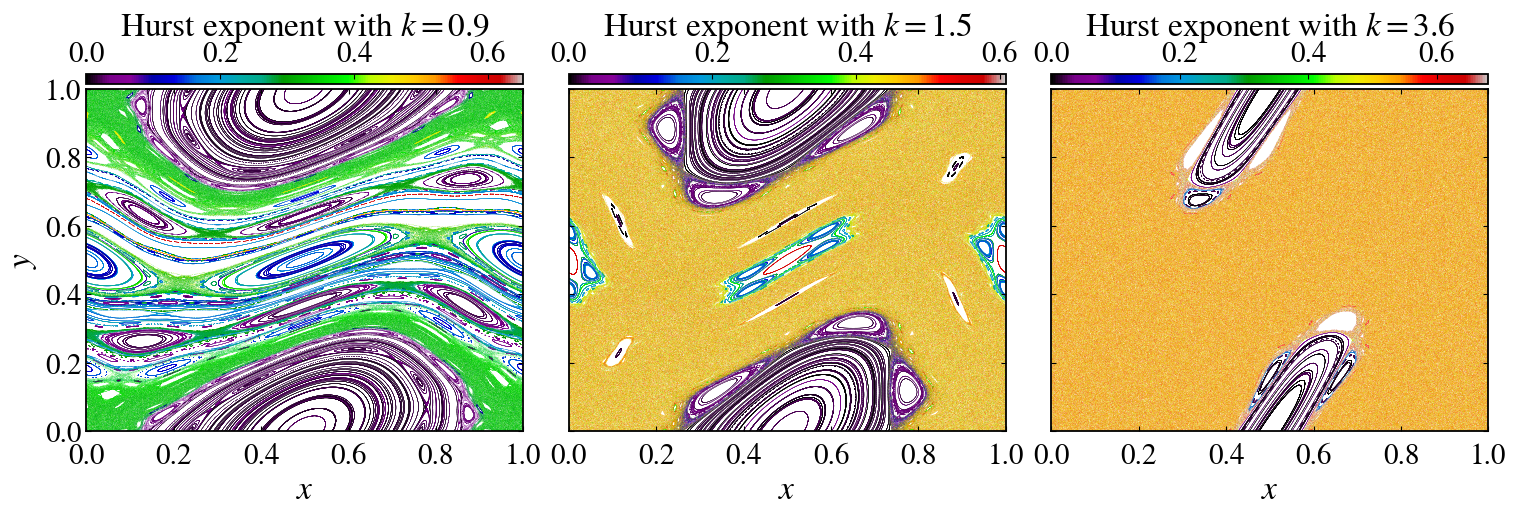

In [ ]:
ps = PlotStyler(fontsize=24)
ps.apply_style()
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
[ps.set_tick_padding(ax[i], pad_x = 8) for i in range(3)]

hms = [0, 0, 0]
for j in range(len(k)):
    for i in range(num_ic):
        hm = ax[j].scatter(trajectories_reshaped[j][i, :, 0],
                           trajectories_reshaped[j][i, :, 1],
                           c=H[i, j, 0] * np.ones(total_time),
                           s=0.05,
                           edgecolor='none',
                           cmap="nipy_spectral",
                           vmin=0,
                           vmax=H[:, j, 0].max())
        hms[j] = hm

[plt.colorbar(hms[i], ax=ax[i], label=rf"Hurst exponent with $k = {k[i]:.1f}$", location="top", aspect=40, pad=0.01) for i in range(len(k))]
ax[0].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel("$y$")
[ax[i].set_xlabel("$x$") for i in range(len(k))]

plt.tight_layout(pad=0.05)
plt.savefig(f"{path_figures}/standard_map_HE.png", dpi=400, bbox_inches='tight')

# Manifolds

In [49]:
ds = dds(model="standard map")
k = 1.5

## Period 1

In [ ]:
# Define the period
period = 1

# Define the parameter
k = 1.5

# Define the fixed points
fixed_points = [[0.0, 0.0], [0.5, 0.0]]

# Classify the stability of the fixed points
stability_info = ds.classify_stability(fixed_points[0], period, parameters=k)
print("Stability of fixed point (0, 0):", stability_info["classification"])
print("Eigenvalues:", stability_info["eigenvalues"])
print("Eigenvectors:", stability_info["eigenvectors"])

stability_info = ds.classify_stability(fixed_points[1], period, parameters=k)
print("Stability of fixed point (0.5, 0):", stability_info["classification"])
print("Eigenvalues:", stability_info["eigenvalues"])
print("Eigenvectors:", stability_info["eigenvectors"])

Stability of fixed point (0, 0): saddle
Eigenvalues: [3.18614066+0.j 0.31385934+0.j]
Eigenvectors: [[ 0.82456484+0.j -0.41597356+0.j]
 [ 0.56576746-0.j  0.90937671+0.j]]
Stability of fixed point (0.5, 0): elliptic (quasi-periodic)
Eigenvalues: [0.25-0.96824584j 0.25+0.96824584j]
Eigenvectors: [[0.38729833+0.5j 0.38729833-0.5j]
 [0.77459667+0.j  0.77459667+0.j ]]


In [7]:
u = [0, 0]
stability = ds.classify_stability(u, period, parameters=k)
stability["classification"], stability["eigenvalues"]

('saddle', array([3.18614066+0.j, 0.31385934+0.j]))

In [8]:
u = [0.5, 0]
stability = ds.classify_stability(u, period, parameters=k)
stability["classification"], stability["eigenvalues"]

('elliptic (quasi-periodic)', array([0.25-0.96824584j, 0.25+0.96824584j]))

In [55]:
saddle = [0, 0]

In [56]:
w_unstable = ds.manifold(saddle, period, parameters=k, n_points=10000, iter_time=13, stability="unstable")

In [57]:
w_stable = ds.manifold(saddle, period, parameters=k, n_points=10000, iter_time=13, stability="stable")

In [58]:
len(w_unstable), len(w_stable)

(2, 2)

In [12]:
trajectory = ds.trajectory([0.05, 0.05], 2500000, parameters=k)

<Figure size 640x480 with 0 Axes>

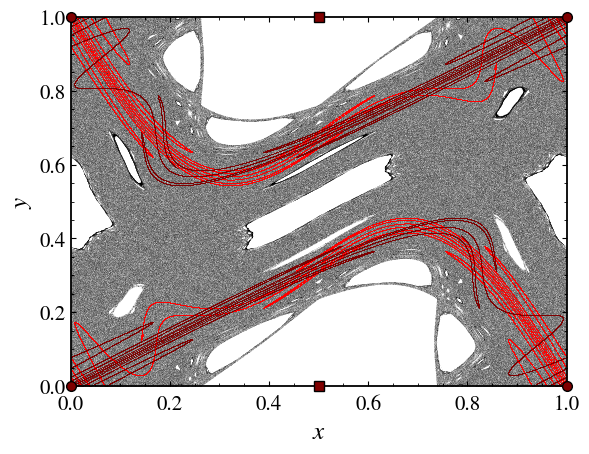

In [ ]:
ps = PlotStyler(fontsize=18, markersize=0.1, markeredgewidth=0, minor_ticks_visible=True)
ps.apply_style()

fig, ax = plt.subplots()
ps.set_tick_padding(ax, pad_x = 6)
plt.plot(trajectory[:, 0], trajectory[:, 1], "ko")

for x in (0, 1):
    for y in (0, 1):
        plt.plot(x, y, "o", color="maroon",
                markersize=7, markeredgewidth=1, markeredgecolor="black",
                clip_on=False, zorder=10)
for y in (0, 1):
    plt.plot(0.5, y, "s", color="maroon",
                markersize=7, markeredgewidth=1, markeredgecolor="black",
                clip_on=False, zorder=10)
plt.plot(w_stable[0][:, 0], w_stable[0][:, 1], "o", markersize=0.75, color="red")
plt.plot(w_stable[1][:, 0], w_stable[1][:, 1], "o", markersize=0.75, color="red")
plt.plot(w_unstable[0][:, 0], w_unstable[0][:, 1], "o", markersize=0.75, color="maroon")
plt.plot(w_unstable[1][:, 0], w_unstable[1][:, 1], "o", markersize=0.75, color="maroon")

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig(f"{path_figures}/standard_map_manifolds.png", dpi=400, bbox_inches='tight')

## Period 2

In [77]:
symmetry_line = lambda v, parameters: 0.0 * np.ones_like(v) # x = g(y) = 0.0
axis = 1
period = 2
y_range = (0.4, 0.6)
num_points= 10000
points = np.linspace(y_range[0], y_range[1], num_points)
tolerance = 2 / num_points

In [78]:
periodic_orbit = ds.find_periodic_orbit(points, period, parameters=k, tolerance=tolerance, verbose=True, symmetry_line=symmetry_line, axis=axis)

Iter 0: Δorbit=[0.         0.50007001], Δbounds=[0.0004     0.00027999], tol=2.00e-04
Iter 1: Δorbit=[0.00000000e+00 3.66680953e-05], Δbounds=[0.0002     0.00013336], tol=1.00e-04
Iter 2: Δorbit=[0.00000000e+00 1.66711911e-05], Δbounds=[1.00000000e-04 6.66709547e-05], tol=5.00e-05
Iter 3: Δorbit=[0.00000000e+00 8.33470281e-06], Δbounds=[5.00000000e-05 3.33372621e-05], tol=2.50e-05
Iter 4: Δorbit=[0.00000000e+00 4.16590749e-06], Δbounds=[2.50000000e-05 1.66715191e-05], tol=1.25e-05
Iter 5: Δorbit=[0.00000000e+00 2.08331464e-06], Δbounds=[1.25000000e-05 8.33503804e-06], tol=6.25e-06
Iter 6: Δorbit=[0.00000000e+00 1.04240075e-06], Δbounds=[6.25000000e-06 4.16769927e-06], tol=3.13e-06
Iter 7: Δorbit=[0.00000000e+00 5.20389292e-07], Δbounds=[3.1250000e-06 2.0838046e-06], tol=1.56e-06
Iter 8: Δorbit=[0.00000000e+00 2.60605826e-07], Δbounds=[1.56250000e-06 1.04191355e-06], tol=7.81e-07
Iter 9: Δorbit=[0.00000000e+00 1.30200118e-07], Δbounds=[7.81250000e-07 5.20953965e-07], tol=3.91e-07
Iter 1

In [79]:
periodic_orbit

array([0. , 0.5])

In [80]:
stability_info = ds.classify_stability(periodic_orbit, period, parameters=k)
print("Periodic orbit:", periodic_orbit)
print("Stability of elliptic orbit:", stability_info["classification"])
print("Eigenvalues:", stability_info["eigenvalues"])
print("Eigenvectors:", stability_info["eigenvectors"])

Periodic orbit: [0.  0.5]
Stability of elliptic orbit: elliptic (quasi-periodic)
Eigenvalues: [-0.125-0.99215674j -0.125+0.99215674j]
Eigenvectors: [[0.7801895 +0.j         0.7801895 +0.j        ]
 [0.58514212-0.22116293j 0.58514212+0.22116293j]]


In [81]:
elliptic_period2 = periodic_orbit

In [82]:
x_range = (0.1, 0.3)
y_range = (0.3, 0.55)

period = 2
grid_size = 1000
tolerance = 3 / grid_size
x = np.linspace(x_range[0], x_range[1], grid_size)
y = np.linspace(y_range[0], y_range[1], grid_size)
X, Y = np.meshgrid(x, y)
grid_points = np.empty((grid_size, grid_size, 2), dtype=np.float64)
grid_points[:, :, 0] = X
grid_points[:, :, 1] = Y

In [83]:
periodic_orbit = ds.find_periodic_orbit(grid_points, period, parameters=k, tolerance=tolerance, verbose=True)

Iter 0: Δorbit=[0.19396929 0.3879654 ], Δbounds=[0.00140741 0.00150751], tol=3.00e-03
Iter 1: Δorbit=[1.88727501e-05 4.57703655e-05], Δbounds=[0.00159259 0.00149249], tol=1.50e-03
Iter 2: Δorbit=[5.40849523e-06 2.42798032e-05], Δbounds=[9.25925926e-05 2.69293317e-05], tol=7.50e-04
Iter 3: Δorbit=[3.42814636e-05 9.01217361e-05], Δbounds=[0.00067011 0.00072307], tol=3.75e-04
Iter 4: Δorbit=[3.10735983e-06 1.23677792e-04], Δbounds=[0.00010528 0.00011067], tol=1.88e-04
Iter 5: Δorbit=[3.70667586e-06 3.53102790e-06], Δbounds=[8.22243364e-05 7.68339155e-05], tol=9.38e-05
Iter 6: Δorbit=[3.01361357e-08 3.36872777e-07], Δbounds=[1.15256636e-05 1.69160845e-05], tol=4.69e-05
Iter 7: Δorbit=[7.66014634e-07 1.37900647e-06], Δbounds=[3.53493364e-05 2.99589155e-05], tol=2.34e-05
Iter 8: Δorbit=[1.82281275e-06 3.55314025e-06], Δbounds=[4.02104356e-06 4.63656818e-07], tol=1.17e-05
Iter 9: Δorbit=[1.25530740e-06 2.27551499e-06], Δbounds=[9.79879227e-06 1.12550932e-05], tol=5.86e-06
Iter 10: Δorbit=[2.1

In [84]:
stability_info = ds.classify_stability(periodic_orbit, period, parameters=k)
print("Periodic orbit:", periodic_orbit)
print("Stability of elliptic orbit:", stability_info["classification"])
print("Eigenvalues:", stability_info["eigenvalues"])
print("Eigenvectors:", stability_info["eigenvectors"])

Periodic orbit: [0.19397649 0.38795298]
Stability of elliptic orbit: saddle
Eigenvalues: [4.09176343+0.j 0.24439341+0.j]
Eigenvectors: [[ 0.89240544+0.j -0.69908845+0.j]
 [ 0.45123445-0.j  0.7150352 +0.j]]


In [85]:
w_unstable_period2 = ds.manifold(periodic_orbit, period, parameters=k, n_points=10000, iter_time=18, stability="unstable")
w_stable_period2 = ds.manifold(periodic_orbit, period, parameters=k, n_points=10000, iter_time=18, stability="stable")

In [86]:
saddle_period2 = periodic_orbit

<Figure size 640x480 with 0 Axes>

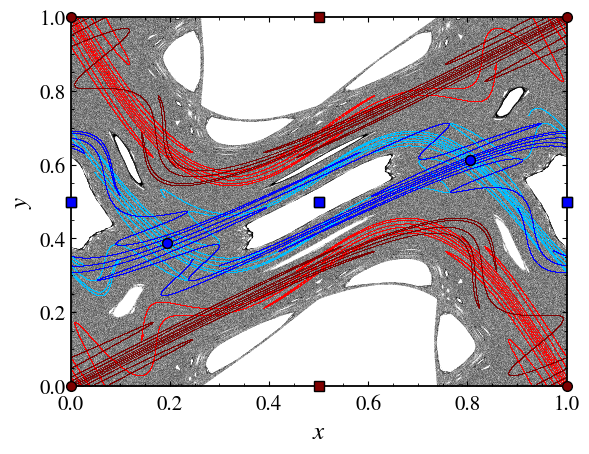

In [ ]:
ps = PlotStyler(fontsize=18, markersize=0.1, markeredgewidth=0, minor_ticks_visible=True)
ps.apply_style()

fig, ax = plt.subplots()
ps.set_tick_padding(ax, pad_x = 6)
plt.plot(trajectory[:, 0], trajectory[:, 1], "ko")

for x in (0, 1):
    for y in (0, 1):
        plt.plot(x, y, "o", color="maroon",
                markersize=7, markeredgewidth=1, markeredgecolor="black",
                clip_on=False, zorder=10)
for y in (0, 1):
    plt.plot(0.5, y, "s", color="maroon",
             markersize=7, markeredgewidth=1, markeredgecolor="black",
             clip_on=False, zorder=10)
plt.plot(w_stable[0][:, 0], w_stable[0][:, 1], "o", markersize=0.75, color="red")
plt.plot(w_stable[1][:, 0], w_stable[1][:, 1], "o", markersize=0.75, color="red")
plt.plot(w_unstable[0][:, 0], w_unstable[0][:, 1], "o", markersize=0.75, color="maroon")
plt.plot(w_unstable[1][:, 0], w_unstable[1][:, 1], "o", markersize=0.75, color="maroon")

p2 = ds.trajectory(elliptic_period2, 4, parameters=k)
for i in range(p2.shape[0]):
    if p2[i, 0] == 0:
        plt.plot(1, p2[i, 1], "s", color="blue",
            markersize=7, markeredgewidth=1, markeredgecolor="black",
            clip_on=False, zorder=10)
    plt.plot(p2[i, 0], p2[i, 1], "s", color="blue",
            markersize=7, markeredgewidth=1, markeredgecolor="black",
            clip_on=False, zorder=10)
p2 = ds.trajectory(saddle_period2, 4, parameters=k)
for i in range(p2.shape[0]):
    plt.plot(p2[i, 0], p2[i, 1], "o", color="blue",
            markersize=7, markeredgewidth=1, markeredgecolor="black",
            clip_on=False, zorder=10)

plt.plot(w_stable_period2[0][:, 0], w_stable_period2[0][:, 1], "o", markersize=0.75, color="deepskyblue")
plt.plot(w_stable_period2[1][:, 0], w_stable_period2[1][:, 1], "o", markersize=0.75, color="deepskyblue")
plt.plot(w_unstable_period2[0][:, 0], w_unstable_period2[0][:, 1], "o", markersize=0.75, color="blue")
plt.plot(w_unstable_period2[1][:, 0], w_unstable_period2[1][:, 1], "o", markersize=0.75, color="blue")

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig(f"{path_figures}/standard_map_manifolds2.png", dpi=400, bbox_inches='tight')

# Escape

## Survival probability

### Escaping from a bounded region in phase space

In [4]:
ds = dds(model="leonel map")

In [5]:
eps = [1e-4, 1e-3, 1e-2]
gamma = 1 
total_time = 7000000
u = [np.pi, 1e-10]

In [6]:
trajectories = [ds.trajectory(u, total_time, parameters=[eps[i], gamma]) for i in range(len(eps))]

<Figure size 640x480 with 0 Axes>

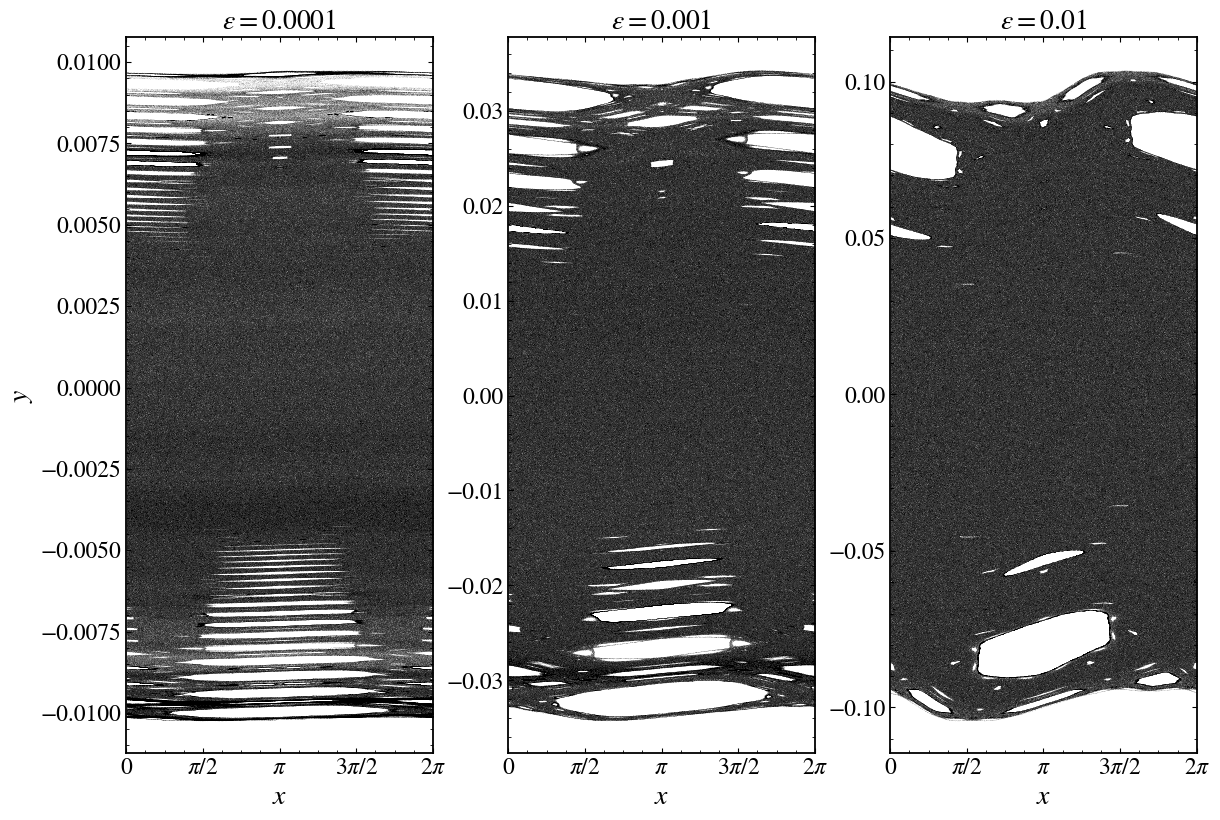

In [ ]:
ps = PlotStyler(fontsize=20, markersize=0.1, markeredgewidth=0, minor_ticks_visible=True)
ps.apply_style()
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(12, 8))
# ps.set_tick_padding(ax[0], pad_x = 6)
for i in range(len(eps)):
    ax[i].plot(trajectories[i][:, 0], trajectories[i][:, 1], "ko")
    ax[i].set_xlabel("$x$")
    ax[i].set_title(fr"$\epsilon = {eps[i]}$", fontsize=20)
ax[0].set_xlim(0, 2 * np.pi)
ax[0].set_ylabel("$y$")

plt.xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi],
           [r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$", r"$2\pi$"])
plt.tight_layout(pad=0.)
plt.savefig(f"{path_figures}/leonel_map_trajectory.png", dpi=400)

In [ ]:
eps = 1e-3
gamma = 1
parameters = [eps, gamma]
total_time = int(1e6)
num_ic = int(1e6)
np.random.seed(13)  # We set the seed for reproducibility
x_range = (0, 2 * np.pi)
y_range = (-1e-14, 1e-14)
# We generate the initial conditions
x = np.random.uniform(x_range[0], x_range[1], num_ic)
y = np.random.uniform(y_range[0], y_range[1], num_ic)
# Define the escape regions
y_esc = np.logspace(np.log10(1e-3), np.log10(0.025), 25)
x_esc = (0, 2 * np.pi)
escapes = np.zeros((len(y_esc), num_ic, 2))

In [7]:
for i in range(len(y_esc)):
    exit = np.array([[x_esc[0], x_esc[1]], [-y_esc[i], y_esc[i]]])
    escapes[i] = [ds.escape_analysis(np.array([x[j], y[j]]), total_time, exit, parameters=parameters, escape="exiting") for j in range(num_ic)]
escapes = np.array(escapes, dtype=np.int32)

In [8]:
escapes.shape

(25, 1000000, 2)

<Figure size 640x480 with 0 Axes>

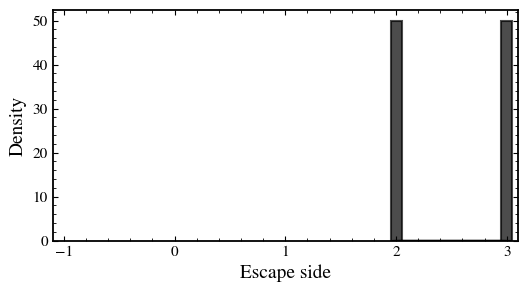

In [11]:
# Create a histogram of the escape times using numpy
escape_basin = escapes[:, :, 0].flatten()
escape_basin = escape_basin[escape_basin != 0]  # Remove zeros (no escape)
escape_hist, escape_bins = np.histogram(escape_basin, density=True, bins=100)
escape_bins = (escape_bins[:-1] + escape_bins[1:]) / 2  # Get the bin centers

ps = PlotStyler(fontsize=14, minor_ticks_visible=True, linewidth=1.5)
ps.apply_style()
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(escape_bins, escape_hist, color='black', linewidth=1.5, width=.1, align='center', edgecolor='black', alpha=0.7)
ax.set_xlabel("Escape side")
ax.set_ylabel("Density")
ax.set_xlim(-1.1, 3.1)
ax.set_xticks([-1, 0, 1, 2, 3])

plt.savefig(f"{path_figures}/leonel_map_escape_basin.png", dpi=400, bbox_inches='tight')

In [12]:
escapes[i, :, 1].max()

497111

In [13]:
sp = []
times = []
for i in range(len(y_esc)):
    time, survival_probability = ds.survival_probability(escapes[i, :, 1], escapes[i, :, 1].max())
    sp.append(survival_probability)
    times.append(time)

In [14]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap, BoundaryNorm

In [15]:
colors = sns.color_palette("icefire", len(y_esc))
cmap = ListedColormap(colors)
Y_esc = np.array(y_esc)
norm = mpl.colors.Normalize(vmin=min(Y_esc), vmax=max(Y_esc))
# Create the ScalarMappable and colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)

In [16]:
max_val = max(array.max() for array in times)

<Figure size 640x480 with 0 Axes>

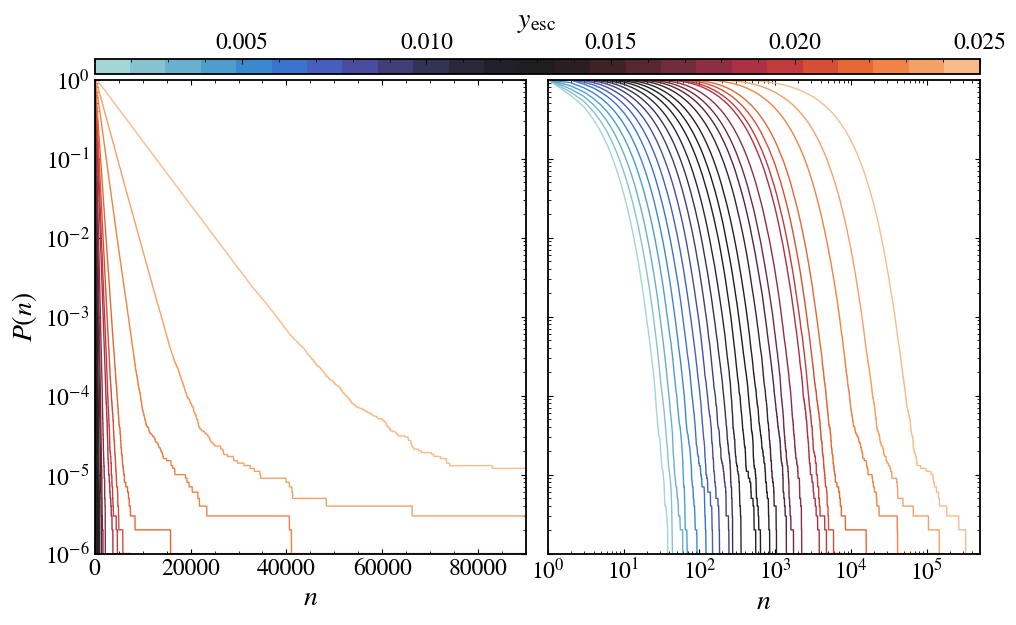

In [17]:
ps = PlotStyler(minor_ticks_visible=True)
ps.apply_style()
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
for i in range(len(y_esc)):
    ax[0].plot(times[i], sp[i], color=colors[i])
    ax[1].plot(times[i], sp[i], color=colors[i])

ax[0].set_xlim(0, 9e4)
ax[0].set_yscale("log")
ax[0].set_ylabel(r"$P(n)$")
ax[0].set_xlabel(r"$n$")
ax[0].set_ylim(1 / num_ic, 1)
ax[1].set_xscale("log")
ax[1].set_xlim(1, max_val)
ax[1].set_xlabel(r"$n$")

cbar = fig.colorbar(sm, ax=ax, aspect=60, location="top", pad=1)
cbar.set_label(r"$y_\mathrm{esc}$")

left, right, top, bottom, wspace = 0.085, 0.97, 0.89, 0.1, 0.05
plt.subplots_adjust(left=left, right=right, top=top, bottom=bottom, wspace=wspace)

pos = [left, top + 0.01, right - left, 0.1]  # Raise it by 0.02
cbar.ax.set_position(pos)
plt.savefig(f"{path_figures}/leonel_map_escape_analysis.png", dpi=400)

## Escape basin

### Escaping through a hole in the system

In [8]:
from numba import njit

In [9]:
@njit
def weiss_map(u, parameters):
    k = parameters[0]
    x, y = u
    y_new = y - k * np.sin(x)
    x_new = (x + k * (y_new ** 2 - 1) + np.pi) % (2 * np.pi) - np.pi

    return np.array([x_new, y_new])

In [10]:
ds = dds(mapping=weiss_map, system_dimension=2, number_of_parameters=1)

In [11]:
import numpy as np

centers = np.array([[0.0, -1.1],
                    [np.pi - 0.1, 1.0]], dtype=np.float64)
size_exit = 0.2

In [ ]:
ks = [0.5, 0.55, 0.60, 0.70]
total_time = 10000

In [24]:
grid_size = 1000
x_range = (-np.pi, np.pi, grid_size)
y_range = (-np.pi, np.pi, grid_size)
X = np.linspace(*x_range)
Y = np.linspace(*y_range)

In [ ]:
from joblib import Parallel, delayed
import itertools

In [26]:
escapes = np.zeros((len(ks), grid_size, grid_size, 2))

In [27]:
for i, k in enumerate(ks):
    
    escape = Parallel(n_jobs=-1)(
        delayed(ds.escape_analysis)([x, y], total_time, centers, parameters=k, hole_size=size_exit)
        for x, y in itertools.product(X, Y)
    )
    escape = np.array(escape).reshape(grid_size, grid_size, 2)

    escapes[i, :, :, :] = escape

In [28]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl

In [29]:
colors = ["#FFFFFF", "#000000", "#DC143C"]
cmap = ListedColormap(colors)
bounds = [-1.5, -0.5, 0.5, 1.5]
norm = BoundaryNorm(boundaries=bounds, ncolors=len(colors))

<Figure size 640x480 with 0 Axes>

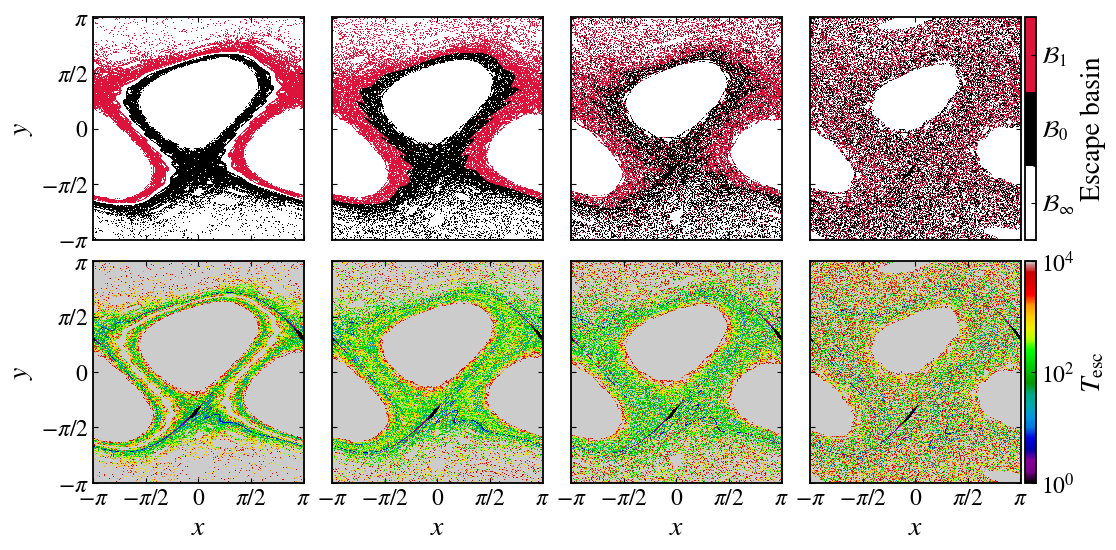

In [30]:
ps = PlotStyler()
ps.apply_style()
fig, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(10, 5))
plt.tight_layout(pad=0)

x_grid, y_grid = np.meshgrid(X, Y, indexing='ij')
for i, k in enumerate(ks):
    hm1 = ax[0, i].pcolormesh(x_grid, y_grid, escapes[i, :, :, 0], cmap=cmap, norm=norm)
    hm2 = ax[1, i].pcolormesh(x_grid, y_grid, escapes[i, :, :, 1], cmap="nipy_spectral", norm=mpl.colors.LogNorm(vmin=1e0, vmax=total_time))
    ax[1, i].set_xlabel(r"$x$")

ax[0, 0].set_ylabel(r"$y$")
ax[1, 0].set_ylabel(r"$y$")
ax[0, 0].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
ax[0, 0].set_xticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
ax[0, 0].set_yticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
ax[0, 0].set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
cbar1 = fig.colorbar(hm1, ax=ax[0, :], aspect=20, pad=0.005, fraction=0.02)
cbar1.set_label(r"Escape basin")
cbar1.set_ticks([-1, 0, 1])
cbar1.set_ticklabels([r"$\mathcal{B}_\infty$", r"$\mathcal{B}_0$", r"$\mathcal{B}_1$"])

cbar2 = fig.colorbar(hm2, ax=ax[1, :], aspect=20, pad=0.005, fraction=0.02)
cbar2.set_label(r"$T_\mathrm{esc}$")

plt.savefig(f"{path_figures}/weiss_map_escape_analysis.png", dpi=400, bbox_inches='tight')

In [31]:
from pycandy import BasinMetrics

In [32]:
for i, k in enumerate(ks):
    bm = BasinMetrics(escapes[i, :, :, 0])
    be = bm.basin_entropy(5, log_base=2)
    print(f"Sb: {be[0]}, Sbb: {be[1]}")

Sb: 0.2810428008488598, Sbb: 0.576261637992331
Sb: 0.49217462289428604, Sbb: 0.7052727991606879
Sb: 0.9369599277786193, Sbb: 1.218770027353412
Sb: 1.2079996025359803, Sbb: 1.466864518425039


0.20982063421298722 1.7901793657870129
0.07603537642336002 1.9239646235766399
0.027260164717587725 1.9727398352824124
0.015395497657105343 1.9846045023428946


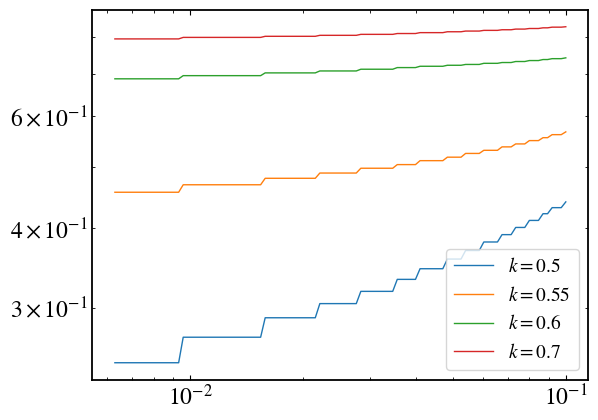

In [40]:
x_grid, y_grid = np.meshgrid(X, Y, indexing="ij")
for i, k in enumerate(ks):
    bm = BasinMetrics(escapes[i, :, :, 0])
    eps, f = bm.uncertainty_fraction(x_grid, y_grid)
    plt.plot(eps, f, label=rf"$k = {k}$")
    coeffs = np.polyfit(np.log10(eps), np.log10(f), 1)
    print(coeffs[0], 2 - coeffs[0])
plt.legend()
plt.xscale("log")
plt.yscale("log")


In [38]:
from numba import prange

In [ ]:

def uncertainty_fraction(u_range, total_time, exits, parameters, eps_range, escape, hole_size, num_ic=1000, seed=13):
    epsilons = np.logspace(np.log10(eps_range[0]), np.log10(eps_range[1]), eps_range[2])
    f = np.zeros_like(epsilons)

    for i in range(epsilons.shape[0]):
        np.random.seed(3 * i**2 + seed)
        x = np.random.uniform(u_range[0][0], u_range[0][1], num_ic)
        y = np.random.uniform(u_range[1][0], u_range[1][1], num_ic)
        u = np.column_stack((x, y))
        eps = epsilons[i]
        
        uncertain = 0
        for j in range(num_ic):
            center = u[j]
            neighbors = [
                [u[j, 0] + eps, u[j, 1]],
                [u[j, 0] - eps, u[j, 1]],
                [u[j, 0], u[j, 1] + eps],
                [u[j, 0], u[j, 1] - eps]
            ]
            ref = ds.escape_analysis(center, max_time=total_time, exits=exits, parameters=parameters, escape=escape, hole_size=hole_size)
            ref = ref[0]

            for nb in neighbors:
                test = ds.escape_analysis(nb, max_time=total_time, exits=exits, parameters=parameters, escape=escape, hole_size=hole_size)
                test = test[0]
                if test != ref:
                    uncertain += 1
                    break
        f[i] = uncertain / num_ic
    
    return epsilons, f


In [52]:
u_range = [[-np.pi, np.pi],
           [-np.pi, np.pi]]
total_time = int(1e4)
centers = np.array([[0.0, -1.1],
                    [np.pi - 0.1, 1.0]], dtype=np.float64)
size_exit = 0.2
k = np.array([0.5])
escape = "entering"
eps_range = (1e-10, 1e-1, 100)

In [53]:
eps, f = uncertainty_fraction(u_range, total_time, centers, k, eps_range, escape=escape, hole_size=size_exit)

In [54]:
np.polyfit(np.log10(eps), np.log10(f), 1)

array([ 0.02128962, -0.55418391])

(0.1, 1e-10)

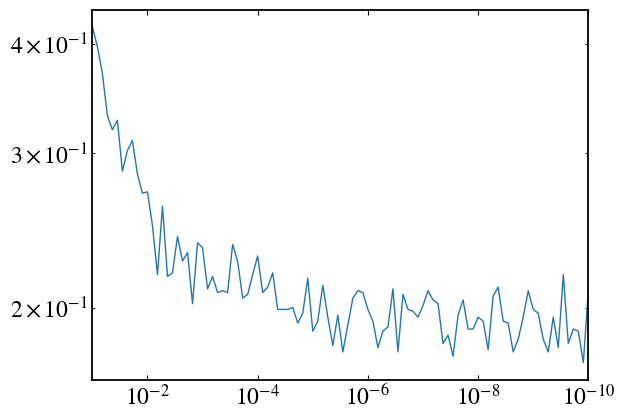

In [55]:
plt.plot(eps, f)
plt.xscale("log")
plt.yscale("log")
plt.xlim(eps.max(), eps.min())